# Simulation of Prices of Coupon Bearing bonds using CIR

In [1]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [7]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [9]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1, 2, 3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [10]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1, 2, 3]])

1    109.864738
2    110.474687
3    108.979942
dtype: float64

In [12]:
rates[[1, 2, 3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028793,0.027551,0.030608
2,0.031814,0.030617,0.030695
3,0.033102,0.034308,0.027718
4,0.033717,0.031598,0.028650


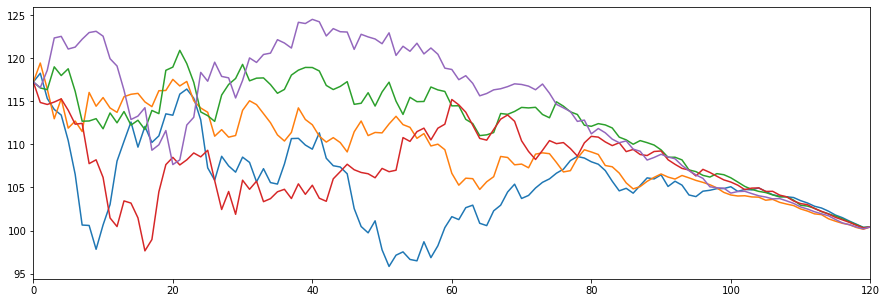

In [17]:
erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4, 5]]).plot(legend=False, figsize=(15, 5))

In [20]:
prices = erk.bond_price(5, 100, .05, 12, rates[[1, 2, 3, 4, 5]])
prices

,1,2,3,4,5
0,109.275,109.275,109.275,109.275,109.275
1,109.712,110.312,108.841,107.972,108.86
2,108.137,108.698,108.661,107.785,109.802
3,107.418,106.869,109.906,107.857,111.56
4,107.022,107.975,109.316,107.966,111.54
...,...,...,...,...,...
116,100.417,100.417,100.417,100.417,100.417
117,100.417,100.417,100.417,100.417,100.417
118,100.417,100.417,100.417,100.417,100.417
119,100.417,100.417,100.417,100.417,100.417


In [21]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.008419
2   -0.008419
3   -0.008419
4   -0.008419
5   -0.008419
dtype: float64

In [28]:
p = erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.032434
2    0.030767
3    0.029517
4    0.031579
dtype: float64

In [31]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1, 2, 3]].tail()

,1,2,3
116,101.49,100.836,101.347
117,101.096,100.676,101.012
118,100.733,100.357,100.681
119,100.366,100.149,100.34
120,100.417,100.417,100.417


In [30]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1, 2, 3]].tail()

,1,2,3
116,186.271,140.232,174.797
117,183.556,143.938,174.642
118,183.551,132.898,175.282
119,183.093,126.473,174.958
120,185.153,124.927,174.918


In [32]:
price_30[[1, 2, 3]].head()

,1,2,3
0,139.532,139.532,139.532
1,142.498,145.713,137.969
2,135.008,137.882,137.692
3,131.955,129.231,145.113
4,130.508,135.401,142.635


In [33]:
# building weighted bond portfolio
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

In [35]:
mean_rets_bonds = rets_bonds.mean(axis=1)
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036359,0.002974,0.150608,2.366031,-0.001601,-0.001431,2.081088,0.0


In [39]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [40]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [41]:
rets = .7 * rets_eq + .3 * rets_bonds
rets_mean = rets.mean(axis=1)
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.061021,0.005107,-0.159015,2.778363,-0.002462,-0.001843,5.911562,0.0
